<a href="https://colab.research.google.com/github/VictorFreir/Breast-Cancer-Predicition/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Hey there!</h1>
<h3>Seja muito bem vindo e sinta-se no seu próprio repositório.</h3>
<p>Dev, se acomode, sirva seu café, pois nós hoje vamos tentar prever se um tumor é maligno ou benigno baseado em suas características.</p>

#Introdução

<p>Antes de começarmos a codar "adoidado", vamos entender o problema que queremos solucionar. Nós queremos prever se um tumor - especificamente na mama - é maligno ou benigno baseado em suas características. Caso você não saiba nada sobre tumores, você conseguirá acompanhar tanquilamente nosso projeto. No entanto, caso, mesmo assim, você queira entender um pouco mais, eu recomendo o seguinte vídeo: <a href='https://www.youtube.com/watch?v=72-2Bumwyh0&t=75s'>Link</a></p>
<p>Seguindo, para solucionarmos esse desafio, nós usaremos a base de dados <a href='https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset'>Breast Cancer Prediction Dataset</a> disponível no <a href='https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset'>Kaggle</a>.
</p>
<p>Ao decorrer do projeto, nós utilizaremos diversas ferramentas que você não precisa conhecer a fundo para acompanhar o projeto. Então, caso não sinta-se confortável com o código, eu estarei explicando a parte mais importante, que é o raciocínio para solucionar o case.
<h3>Ao código!</h3>
<p>Agora, vamos partir para o código. Começaremos importando as bibliotecas necessárias para o nosso projeto e a base de dados:</p>

In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0
2,19.69,21.25,130.0,1203.0,0.10960,0


In [3]:
df.shape

(569, 6)

<p>Acima, podemos ver, respectivamente, as bibliotecas que utilizaremos, as três primeiras linhas da base de dados junto às suas informações trazidas e o "tamanho" da nossa base.</p>

# Pré-processamento dos dados

Nas próximas linhas de código, estaremos averiguando se será necessária alguma limpeza, modificação ou padronização dos dados. Começaremos vendo se os existe algum dado faltante no nosso Dataset:

In [4]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<p>Vemos que nossa base já aparenta ser uma base limpa. Dessa forma, podemos então verificar se os tipos dos dados estão em númericos ou em strings(palavras):</p>

In [5]:
for column in df.columns:
    print(df[column].dtype)

float64
float64
float64
float64
float64
int64


<p>Bem, visto que todas as colunas já estão em seus devidos formatos, nós podemos seguir para a próxima etapa do projeto.</p>

# Análise exploratória dos dados

<p>Tendo verificado que nossa base de dados é limpa, podemos seguir para a parte de analisar os dados e tentar enxergar padrões neles.</p>

In [6]:
df.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0
2,19.69,21.25,130.0,1203.0,0.10960,0


<p>Para começar, já que todas as variáveis preditoras são valores continuos, nós podemos dar uma olhada na correlação entre elas:</p>

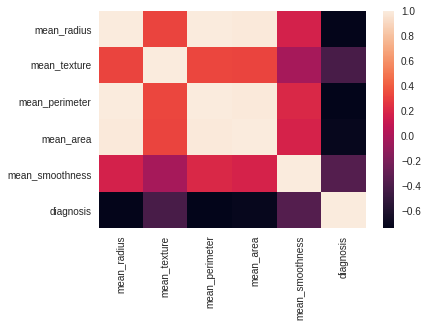

In [7]:
sns.heatmap(df.corr())

<p>Visto que precisamos encontrar padrões de comportamento dos dados, vamos plotar alguns gráficos que possam nos mostrar algo de interessante, começando vendo a relação da textura com o tamanho do raio do tumor e o diagnóstico:</p>

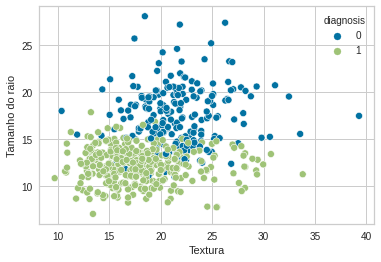

In [17]:
fig = sns.scatterplot(data=df,x='mean_texture',y='mean_radius',hue='diagnosis')
fig.set(xlabel='Textura',ylabel='Tamanho do raio')
plt.show()

<p>Vemos que temos uma forte padronização no que diz respeito ao tamanho do raio e o diagnóstico, uma vez que, normalmente, quanto maior o tamanho do raio, menor as chances do tumor ser maligno.</p>

[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'Área ocupada pelo tumor')]

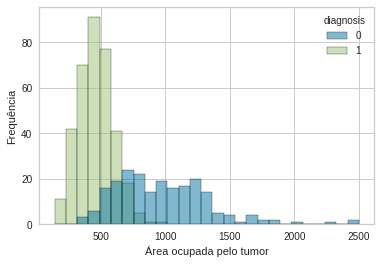

In [18]:
fig = sns.histplot(data=df,x='mean_area',hue='diagnosis')
fig.set(xlabel='Área ocupada pelo tumor',ylabel='Frequência')


<p>Acima, nós confirmamos que normalmente os menores tumores - no questito área ocupada - tem mais chances de serem malignos.</p>

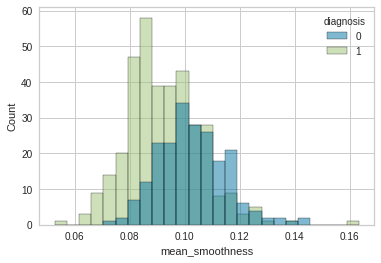

In [20]:
sns.histplot(data=df,x='mean_smoothness',hue='diagnosis')

<p>Agora, você pode ver que a "suavidade tumoral" também tem um intervalo onde a incidência de tumor maligno é consideravelmente maior que a de tumor benigno.</p>
<p>Portanto, nós já podemos ver que os dados tem padrões com relação ao diagnóstico ser benigno ou maligno. Tendo isso em vista, nós podemos começar a criar nosso modelo de Machine Learning, uma vez que ele irá identificar esses padrões para prever se um tumor x será maligno ou benigno.</p>

# Machine Learning

"Victor, qual algoritmo de Machine Learning nós usaremos?". Ótima pergunta, por ser um projeto de classificação em uma base de dados pequena, nós utilizaremos um modelo de Naive Bayes. Para isso, vamos começar separando as variáveis preditoras e a classe:

In [21]:
labelx = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']
x = df[labelx]
y = df['diagnosis']

<p>Também, iremos separar os dados em dados de teste e dados de treinamento, para que, no final, possamos avaliar nosso modelo:</p>

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

"Victor, e o modelo? A gente não faz nunca não é?". Então, como você está ansioso para essa parte, nós, enfim, chegamos nela. Vamos começar criando o nosso modelo Naive Bayes e treinando ele:

In [23]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

<p>Tendo criado nosso modelo, nós podemos fazer a parte mais divertida, prever os valores:</p>

In [24]:
predictions = naive_bayes.predict(x_test)

<p>"Divertido, Victor? Não aconteceu nada!" Calma, jovem, você está pensando isso, pois não vimos quanto o modelo acerta, quanto erra. Então, faremos isso:</p>

In [25]:
accuracy_score(y_test,predictions)

0.8947368421052632

<p>É isso mesmo que tu tá vendo, nosso modelo acertou aproximadamente 89,4% das vezes. Ou seja, a cada 100 tumores passados, nosso modelo acerta 89 diagnósticos.</p>
<p>"Victor, ia ser massa se desse para a gente ver se ele caracterizou um tumor maligno como benigno ou vice versa." Então, deixa eu te dizer que tem como fazer isso: </p>

0.8947368421052632

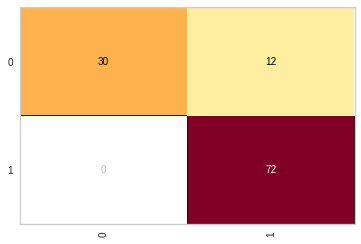

In [26]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

No eixo X é o que o nosso modelo marcou e no eixo Y é o que devia ser marcado.

# Conclusão

<p>Chegando ao fim, nós conseguimos solucionar o problema inicial que era: prever se um tumor era maligno ou benigno com uma acertividade relevante. Vimos que nosso modelo se saiu muito bem alcançando incríveis 89,4% de acurácia na nossa base de dados. </p>
<p>Portanto, eu agradeço por você ter me acompanhado até aqui, espero sinceramente que tenha gostado da nossa aventura nos dados e que sua caneca de café tenha secado de tanto interesse. Caso tenha gostado, te convido à acompanhar meu desenvolvimento profissional pelo meu <a href="https://github.com/VictorFreir" >GitHub</a> ou pelo meu <a href="https://www.linkedin.com/in/victor-vin%C3%ADcius-freire-de-ara%C3%BAjo-bb3782207">LinkedIn</a>. Sinta-se a vontade para conhecer meus projetos passados e antigos. Caso tenha alguma crítica, sugestão ou dúvida você está livre para me contactar pelas minhas redes. Até a próxima!</p>

